<a href="https://colab.research.google.com/github/jonatasesteves/jonatas_data_science/blob/main/Projeto_1_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *New Orleans*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade New Orleans, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/la/new-orleans/2022-09-09/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id - numero de identificação do imóvel
* name - nome da propriedade a qual está sendo anunciada
* host_id - número de identificação do proprietário da propriedade anunciada
* host_name - Nome do hospedeiro
* neighbourhood_group - Não há valores válidos
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - tipos de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de avaliações que a propriedade possui
* last_review - data da ultima avaliação
* reviews_per_month - quantidade de avaliações por mês
* calculated_host_listings_count - quantidade de imóves do hospedeiro
* availability_365 - número de dias de disponibilidade em 365 dias
* `number_of_reviews_ltm` - quantidade de reviews nos ultimos 12 meses
* `license` - Número de licença Airbnb


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]}')

# verificar as 5 primeiras entradas do dataset
df.head()

Entradas: 6927
Variáveis: 18


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,19091,Fully Furnished Cozy Apartment,72880,John,NaN,Leonidas,29.96100,-90.11950,Entire home/apt,60,1,497,2022-04-04,3.29,1,122,30,"20-RSTR-27040, 20-OSTR-00105"
1,71624,Ravenwood Manor (Historic Bywater),367223,Susan,NaN,Bywater,29.96153,-90.04364,Entire home/apt,150,3,271,2022-09-05,1.92,1,321,31,"21-RSTR-18609, 20-OSTR-31018"
2,74498,Maison Marais 1: Large Local Living,391462,Georgia,NaN,St. Roch,29.96986,-90.05172,Entire home/apt,93,3,553,2022-09-04,3.95,3,202,40,"Exempt: This listing is a licensed hotel, mote..."
3,79536,FeelAtHomeInNO PrivateApt,428362,Miriam,NaN,Seventh Ward,29.97803,-90.07450,Entire home/apt,69,3,580,2022-08-23,4.19,1,29,67,"21-RSTR-18550, 21-OSTR-18392"
4,79609,Moon Over Mazant - FIRST and FINEST in Bywater!,428909,Stephen,NaN,St. Claude,29.96448,-90.03667,Private room,111,3,438,2022-09-05,3.13,1,244,44,"19STR-20697, 20-OSTR-24055"


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
percentual_valores_ausentes = (df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

# imprimindo percentual na formatação de %
for i in range(len(percentual_valores_ausentes)):
  print(f'{percentual_valores_ausentes.keys()[i]:<35} {round(float((percentual_valores_ausentes[i]))*100,1)}%')



neighbourhood_group                 100.0%
license                             11.2%
reviews_per_month                   10.9%
last_review                         10.9%
host_name                           0.5%
minimum_nights                      0.0%
number_of_reviews_ltm               0.0%
availability_365                    0.0%
calculated_host_listings_count      0.0%
number_of_reviews                   0.0%
id                                  0.0%
name                                0.0%
room_type                           0.0%
longitude                           0.0%
latitude                            0.0%
neighbourhood                       0.0%
host_id                             0.0%
price                               0.0%


In [ ]:
# Excluindo coluna com dados faltantes com todos os dados faltantes
df.drop(columns=['neighbourhood_group'], inplace=True)


### **Q3. Qual o tipo de distribuição das variáveis?** 

In [ ]:
#Exibindn tipos de dados das variáveis
display(df.dtypes)



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [ ]:
# transformando dados

df[['id','host_id','latitude','longitude']] = df[['id','host_id','latitude','longitude']].astype('object')

df_variaveisNum = df.select_dtypes(include=['float64','int64']) #crinando um df com apenas dtypes numericos a serem avaliados




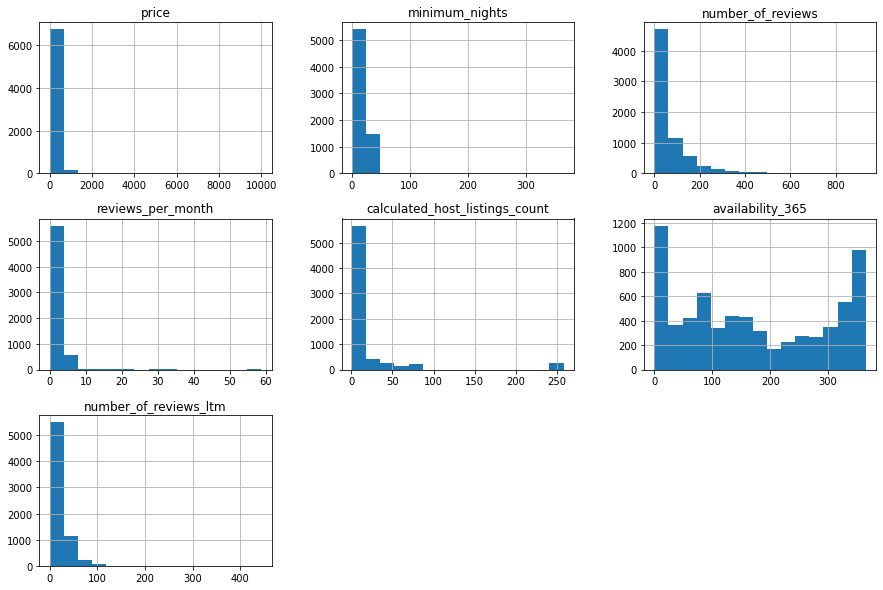

In [ ]:
# plotar o histograma das variáveis numéricas
df_variaveisNum.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price`
print(f'Média de preços de aluguel: U$ {round(df.price.mean(),2)}')

Média de preços de aluguel: U$ 197.92


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.144368,-0.096174,-0.094357,-0.041490,0.044576
minimum_nights,0.144368,1.000000,-0.147320,-0.234327,-0.125542,-0.043880
number_of_reviews,-0.096174,-0.147320,1.000000,0.562457,-0.102914,-0.116501
reviews_per_month,-0.094357,-0.234327,0.562457,1.000000,-0.000245,-0.000632
calculated_host_listings_count,-0.041490,-0.125542,-0.102914,-0.000245,1.000000,0.306284
availability_365,0.044576,-0.043880,-0.116501,-0.000632,0.306284,1.000000


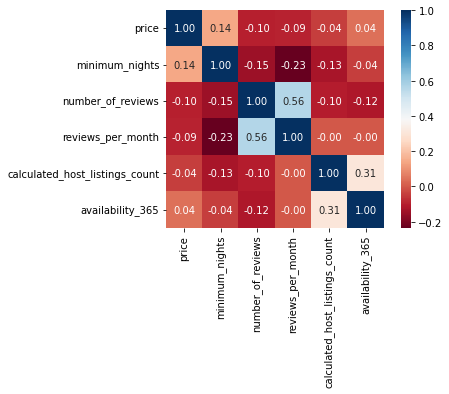

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f',square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    5949
Private room        880
Hotel room           59
Shared room          39
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
percentual_imoveis = round(df.room_type.value_counts() / df.shape[0],3)

# imprimindo percentual na formatação de %
for i in range(len(percentual_imoveis)):
  print(f'{percentual_imoveis.keys()[i]:<20} {round(float((percentual_imoveis[i]))*100,1)}%')

Entire home/apt      85.9%
Private room         12.7%
Hotel room           0.9%
Shared room          0.6%


### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
round(df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False),2)[:10] #top 10 localidades mais caras

neighbourhood
Read Blvd East        328.08
West Lake Forest      274.00
Pontchartrain Park    272.83
Lake Catherine        269.10
French Quarter        241.76
Marigny               238.14
Lakewood              236.67
Uptown                233.02
Old Aurora            228.03
Central City          227.17
Name: price, dtype: float64

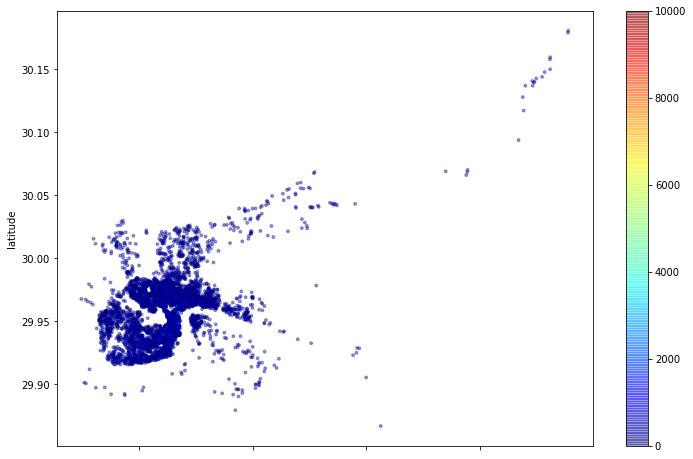

In [ ]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter',x='longitude',y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
print(f'a média da variável minimum_nights é {round(df.minimum_nights.mean(),2)} noites')

a média da variável minimum_nights é 8.82 noites


## Conclusões


A partir de uma analise básica da base de dados do Airbnb a respeito da cidade de New Orleans, já é possível destacar alguns pontos.
Por ser uma análise superficial, é necessário cuidados ao avaliar localidades caras, pois os locais com poucos imóveis disponíveis podem não mostrar a real informação estátistica. 
Dito isso, é importante destacar o que já se tem de informação para quem deseja fazer uma viagem para o berço do blues, como a média do mínimo de noites para aluguel, preço médio dos alugueis, tipo de imóvel mais alugado e as correlações entre as variáveis estudadas.
Com isso, se tem um panomrama geral dos alugueis de imóveis pelo Airbnb.